# Try k-means on the data shown in figure 1c

1. dataset - do the same sets as Scala et al.'s article. First use Yao et al.'s UMI counts, then use Scala et al.'s exon/intron counts
2. will do t-SNE representation used in figure 1c, and if possible try on common gene count representation after that
3. number of clusters: 3 for broad cell family, 
4. evaluation method: adjusted mutual information, Fowlkes-Mallows

In [3]:
import pickle
from collections import namedtuple
import numpy as np
import os.path
from preprocess_figdata import preprocess_figure_data
from sklearn.cluster import KMeans
from plot_fig1c import plot_sidebyside
from misc_tools import *

In [4]:
# load Yao et al.'s dataset for the Vip/Lamp5 cells
m1data = pickle.load(open('../../data/processed/reduced-allen-data/10X_cells_v2_AIBS.pickle', 'rb'))["viplamp"]

# load the study results of Scala et al.
houstonData = namedtuple('houstonData', 'exonCounts intronCounts cells genes layers cre yields traced \
                                         depth thickness ephys ephysNames exclude \
                                         mice_ages mice_cres morphometrics morphometricsNames zProfiles \
                                         exonLengths intronLengths')
m1 = pickle.load(open('../../data/processed/rnaseq/m1.pickle', 'rb'))

#load transcriptomic type assignment from Scala et al.
ttypes = pickle.load(open('../../data/processed/rnaseq/ttypes.pickle', 'rb'))
subset = np.isin(ttypes['family'], ['Lamp5', 'Vip']) #mask to get vip/lamp5 cell info from m1

# load t-SNE representations of Yao et al.'s Vip/Lamp5 cells
Z = pickle.load(open('../../data/processed/rnaseq/10x-tsne-viplamp.pickle', 'rb')) 

In [5]:
# if the datasets are not preprocessed and put into pickle files yet, do it now
UMIcnt_path = "../../data/clustering_datasets/viplamp_umi.pickle"
exintex_path = "../../data/clustering_datasets/viplamp_exint.pickle"

if (os.path.isfile(UMIcnt_path)==False) and (os.path.isfile(exintex_path)==False):
    preprocess_figure_data(m1data['counts'], m1data['genes'], m1.exonCounts[subset,:], m1.intronCounts[subset,:], 
                    m1.genes, m1.exonLengths, m1.intronLengths, UMI_fname=UMIcnt_path, 
                    exint_fname=exintex_path)

# Testing k-means on Yao et al.'s t-SNE representation
This is a test: will see if k-means can separate cell families Vip, Lamp5, and Sncg.

In [6]:
family_names, family_codes = le_family_names(m1data)

Family_labels:
Lamp5: [0]
Sncg: [1]
Vip: [2]


In [7]:
pred_family = KMeans(n_clusters=3, random_state=0).fit_predict(Z)

In [11]:
ami_family, fms_family = ami_and_fmscore(family_codes, pred_family)

Adjusted Mutual Info: 0.4434050321834575
(0: bad, 1: perfect)

Fowlkes-Mallows Score:  0.656219406649552
(0: bad, 1: perfect)



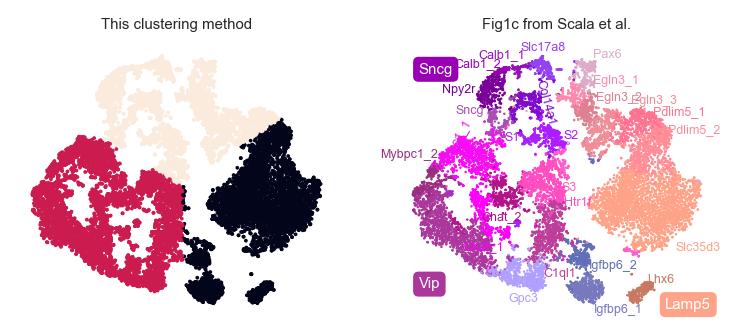

In [9]:
plot_sidebyside(pred_family, Z, m1data, title="This clustering method")

15511

In [33]:
m1data["clusters"].shape

(15511,)

In [34]:
m1data["clusterNames"][m1data["clusters"]].shape

(15511,)